In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create synthetic data

# Features: [Weight (grams), Texture (0: Smooth, 1: Rough)]
X = np.array([
    [150, 0],  # Apple
    [170, 0],  # Apple
    [140, 1],  # Orange
    [130, 1],  # Orange
    [160, 0],  # Apple
    [180, 1],  # Orange
])

# Labels: 0 = Apple, 1 = Orange
y = np.array([0, 0, 1, 1, 0, 1])

In [4]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 3: Create and train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Step 4: Make predictions
y_pred = model.predict(X_test)

In [7]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


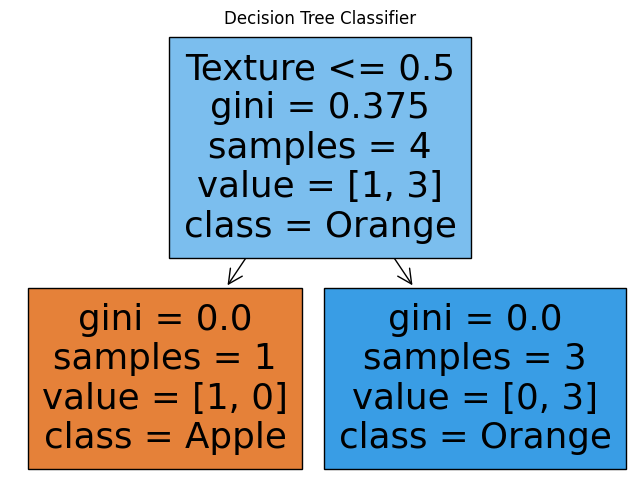

In [8]:
# Step 6: Visualize the decision tree
plt.figure(figsize=(8, 6))
plot_tree(model, feature_names=["Weight", "Texture"], class_names=["Apple", "Orange"], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [10]:
# Step 1: Create synthetic dataset
# Square footage, location, and binary target (1: Sold above asking, 0: Did not sell above asking)
data = {
    "SquareFootage": [1200, 1500, 900, 2000, 800, 2500, 1000, 2200, 1700, 1300],
    "Location": ["Urban", "Suburban", "Rural", "Urban", "Rural", "Urban", "Suburban", "Urban", "Suburban", "Rural"],
    "SoldAboveAsking": [1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
}

# Convert to a DataFrame
df = pd.DataFrame(data)

In [11]:
# Step 2: Preprocess the data
# Convert categorical 'Location' to numeric using LabelEncoder
label_encoder = LabelEncoder()
df["Location"] = label_encoder.fit_transform(df["Location"])

# Features (X) and target (y)
X = df[["SquareFootage", "Location"]]
y = df["SoldAboveAsking"]

# Standardize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [13]:
# Step 4: Train a Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [14]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [15]:
# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
 [[2 0]
 [0 1]]


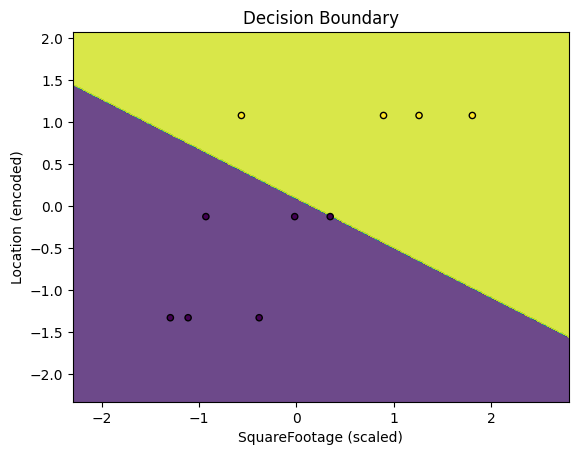

In [16]:
# Visualizing decision boundary (for educational purposes; works with 2 features)
def plot_decision_boundary(X, y, model):
    h = 0.01  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.xlabel("SquareFootage (scaled)")
    plt.ylabel("Location (encoded)")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_scaled, y, model)